# Installing the library

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization(for EDA)
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#We will use the popular scikit-learn library to develop our machine learning algorithms

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc

# Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import string

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')#read train data as a dataframe
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')#read test data as a dataframe
print('The total number of instance in train dataset: ',len(df_train))
print('The total number of instance in test dataset: ',len(df_test))

The total number of instance in train dataset:  891
The total number of instance in test dataset:  418


In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.info()
df_train.describe()#describe function can show many information like mean, min, max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.info()
df_test.describe()#describe function can show many information like mean, min, max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Filling the missing data

Blow section is deal with missing data

Also we can see the Cabin missing too much value, so if we use any value replace it, it will make a a lot basis, so drop it maybe the best solution

In [6]:
df_train_copy = df_train.copy(deep=True)
df_test_copy = df_test.copy(deep=True)

In [7]:
df_train_copy.drop(columns=['Cabin'],axis=1,inplace=True)
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
#Next, we have to solve the Embarked
df_train_copy[df_train_copy['Embarked'].isnull()]
#And based on the search Miss. Amelie  and Mrs. George Nelson were both embarked at Southampton(https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html,
#https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html), so it can fill in S easily
df_train_copy.loc[df_train_copy['PassengerId']==62,'Embarked'] = 'S'
df_train_copy.loc[df_train_copy['PassengerId']==830,'Embarked'] = 'S'

In [9]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
df_test_copy.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df_test_copy.drop(columns=['Cabin'],axis=1,inplace=True)
#For now, because it only have one missing value,so I just fix in the median value for fare
df_test_copy.loc[df_test_copy['PassengerId']==1044,'Fare']=df_test_copy.describe().loc['50%','Fare']

In [12]:
df_test_copy.info()#Right now, Only age have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


# Try to use the groupby method in pandas make another way clean way and do the features engineering.

In [13]:
df_train_copy2 = df_train_copy.copy(deep=True)

In [14]:
df_train_copy2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [15]:
print('The null instance in Age column:',sum(df_train['Age'].isnull()),', and it is the percentage of the total instances:',sum(df_train['Age'].isnull())/len(df_train)*100,'%')
print('The null instance in Cabin column:',sum(df_train['Cabin'].isnull()),', and it is the percentage of the total instances:',sum(df_train['Cabin'].isnull())/len(df_train)*100,'%')
print('The null instance in Embarked column:',sum(df_train['Embarked'].isnull()),', and it is the percentage of the total instances:',sum(df_train['Embarked'].isnull())/len(df_train)*100,'%')

The null instance in Age column: 177 , and it is the percentage of the total instances: 19.865319865319865 %
The null instance in Cabin column: 687 , and it is the percentage of the total instances: 77.10437710437711 %
The null instance in Embarked column: 2 , and it is the percentage of the total instances: 0.22446689113355783 %


 The question is 
1. Have Pclass effect surived 
2. and have the age in different Pclass effect surived
3. and have alone or not effect surived

<AxesSubplot:title={'center':'The affect of different Pclass to the survived'}>

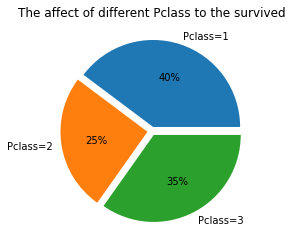

In [16]:
'''First let us plot the survived according to the different Pclass, then we can notice the Pclass 2 actually has smaller survied changes'''
df_train_copy2.groupby('Pclass')['Survived'].sum().plot(kind='pie',labels=('Pclass=1','Pclass=2','Pclass=3'),ylabel='',autopct='%1.0f%%',explode=(0.05,0.05,0.05),title='The affect of different Pclass to the survived')

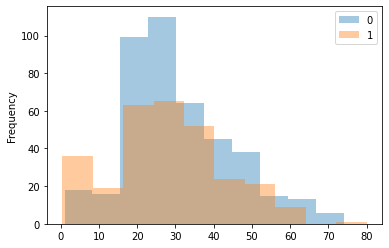

In [17]:
df_train_copy2.groupby('Survived')['Age'].plot(kind='hist', alpha=0.4)
plt.legend()
plt.show()

In [18]:
'''The try to explore Pclass and age affect the survied change or not, but still the age columns still have the outliers like the missing value, so it will affect the mean value of the data, so if we fill in the mean to 
   the missing value cell, it could be cause the bias, so the median value of the percific Pclass could be the better choose to fill in.'''
median_frame = df_train_copy2.groupby('Pclass')['Age'].median()
print(median_frame)
print(median_frame.iloc[0])
print(median_frame.iloc[1])
print(median_frame.iloc[2])
Pclass1_empty_example = df_train_copy2[df_train_copy2['Pclass']==1 & df_train_copy2['Age'].isnull()]
#print(Pclass1_empty_example)

#fill in all the empty age according the Pclass
df_train_copy2['Age'] = df_train_copy2.groupby(['Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))
df_test_copy['Age'] = df_train_copy2.groupby(['Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64
37.0
29.0
24.0


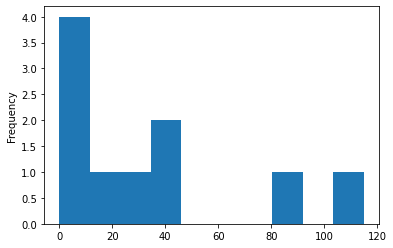

In [19]:
'''Then let see in the different Pclass different age will affect the survied change or not.'''
#First I have to chunk the age into range of 10 e.g. 7->10 6->10
df_train_copy2['Age_Level'] = pd.cut(df_train_copy2['Age'], bins=[0,10,20,30,40,50,60,70,80,90,100], labels=[10,20,30,40,50,60,70,80,90,100], right=False)
df_train_copy2.groupby(['Pclass','Age_Level'])['Survived'].sum()
y = []
y=df_train_copy2['Age_Level'].value_counts()
df_train_copy2.groupby('Age_Level')['Survived'].sum().plot(kind = 'hist',y=(0,101,10))
plt.show()

In [20]:
df_test_copy['Age_Level'] = pd.cut(df_test_copy['Age'], bins=[0,10,20,30,40,50,60,70,80,90,100], labels=[10,20,30,40,50,60,70,80,90,100], right=False)
print(df_test_copy['Age_Level'].max())

80


# Corrleation

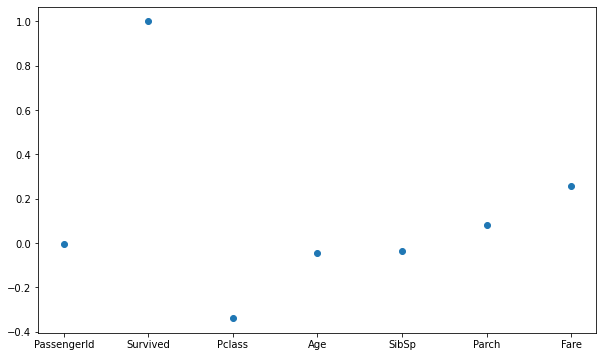

In [21]:
Corrleation_matrix = df_train_copy2.corr()
scatter_x = ['PassengerId',  'Survived',  'Pclass',     'Age',   'SibSp',   'Parch',    'Fare']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(scatter_x,Corrleation_matrix.iloc[1,:])
plt.show()

# Title cleaning and feature engineering

In [22]:
import re

In [23]:
#Next deal with the title in training data set
second_part_of_name = df_train_copy2['Name'].str.split(',',1)
second_part_of_name
title_list = []
for text in df_train_copy2['Name']:
  second_part = text.split(',',1)[1]
  the_title = second_part.split('.',1)[0]
  the_title = the_title.strip()
  title_list.append(the_title)

df_train_copy2['Title'] = title_list
#after is replace miss, mrs, ms... to miss/mrs
df_train_copy2['Title'] = df_train_copy2['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs')
#replace dr,col,major... to dr/major/military
df_train_copy2['Title'] = df_train_copy2['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/major/Military')
df_train_copy2['Title']

0                     Mr
1               Miss/Mrs
2               Miss/Mrs
3               Miss/Mrs
4                     Mr
             ...        
886    Dr/major/Military
887             Miss/Mrs
888             Miss/Mrs
889                   Mr
890                   Mr
Name: Title, Length: 891, dtype: object

In [24]:
#Next deal with the title in testing data set
second_part_of_name = df_test_copy['Name'].str.split(',',1)
second_part_of_name
title_list = []
for text in df_test_copy['Name']:
  second_part = text.split(',',1)[1]
  the_title = second_part.split('.',1)[0]
  the_title = the_title.strip()
  title_list.append(the_title)

df_test_copy['Title'] = title_list
#after is replace miss, mrs, ms... to miss/mrs
df_test_copy['Title'] = df_test_copy['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs')
#replace dr,col,major... to dr/major/military
df_test_copy['Title'] = df_test_copy['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/major/Military')
df_test_copy['Title']

0            Mr
1      Miss/Mrs
2            Mr
3            Mr
4      Miss/Mrs
         ...   
413          Mr
414    Miss/Mrs
415          Mr
416          Mr
417      Master
Name: Title, Length: 418, dtype: object

# Normalize the fare column:

<AxesSubplot:ylabel='Frequency'>

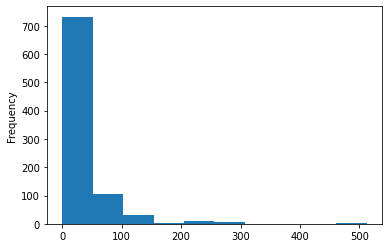

In [25]:
df_train_copy2['Fare'].plot(kind='hist')

<function matplotlib.pyplot.show(close=None, block=None)>

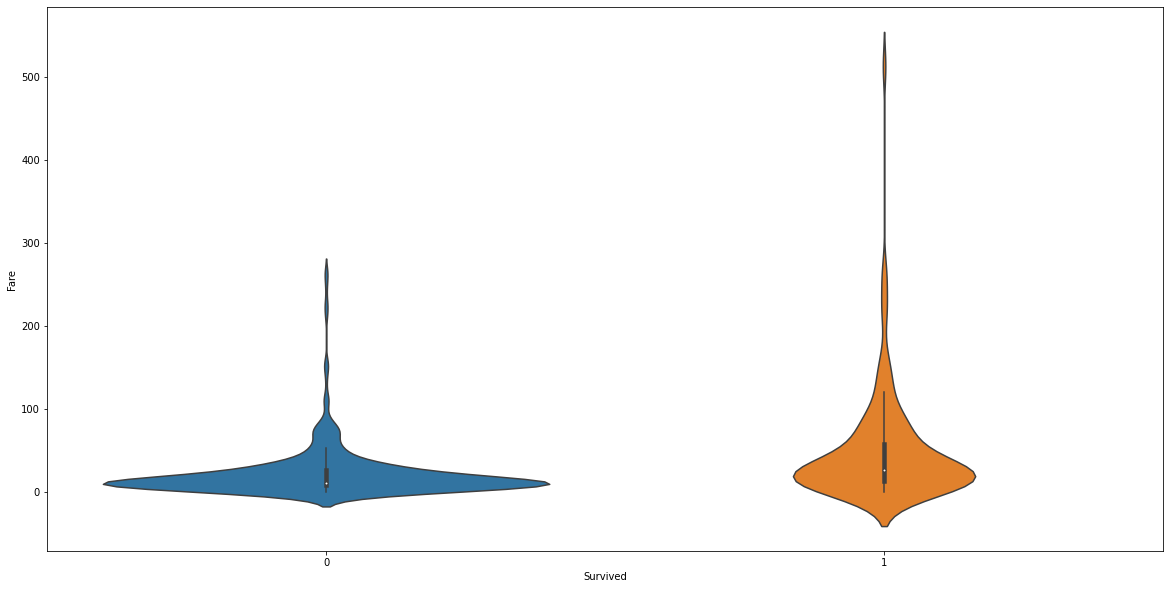

In [26]:
f, ax = plt.subplots(figsize=(20,10))
sns.violinplot(x='Survived',y='Fare', data=df_train_copy2, split=True, ax=ax, title = 'Fare affect Surived', y_ticks=(range(0,101,10)))
plt.show

In [27]:
#training data set
scaler = StandardScaler()
fare_standard = scaler.fit_transform(df_train_copy2['Fare'].values.reshape(-1,1))
df_train_copy2['Fare'] = fare_standard
#testing data set
scaler = StandardScaler()
fare_standard = scaler.fit_transform(df_test_copy['Fare'].values.reshape(-1,1))
df_test_copy['Fare'] = fare_standard

# IsAlone clearning:

In [28]:
#Alone or not, if the sibsp plus parch is greater than 0, the isAlone will be equal to 0
df_train_copy2['IsAlone'] = df_train_copy2['SibSp']+df_train_copy2['Parch']
#print(len(df_train_copy2['Alone']))
for index in range(len(df_train_copy2['IsAlone'])):
  if df_train_copy2['IsAlone'].iloc[index] >0:
    df_train_copy2['IsAlone'].iloc[index] = 0
  else:
    df_train_copy2['IsAlone'].iloc[index] = 1
df_train_copy2.groupby(['Survived'])['IsAlone'].value_counts()

Survived  IsAlone
0         1          374
          0          175
1         0          179
          1          163
Name: IsAlone, dtype: int64

In [29]:
df_test_copy['IsAlone'] = df_test_copy['SibSp']+df_test_copy['Parch']
#print(len(df_train_copy2['Alone']))
for index in range(len(df_test_copy['IsAlone'])):
  if df_test_copy['IsAlone'].iloc[index] >0:
    df_test_copy['IsAlone'].iloc[index] = 0
  else:
    df_test_copy['IsAlone'].iloc[index] = 1

# Model training and evaluation

In [30]:
df_train_copy2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Level,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,S,30,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C,40,Miss/Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,S,30,Miss/Mrs,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,S,40,Miss/Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,S,40,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,-0.386671,S,30,Dr/major/Military,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,-0.044381,S,20,Miss/Mrs,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,-0.176263,S,30,Miss/Mrs,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,-0.044381,C,30,Mr,1


In [31]:
df_test_copy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Level,Title,IsAlone
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,-0.497413,Q,30,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,-0.512278,S,40,Miss/Mrs,0
2,894,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,-0.464100,Q,30,Mr,1
3,895,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,-0.482475,S,40,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,-0.417492,S,40,Miss/Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,-0.493455,S,30,Mr,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,44.0,0,0,PC 17758,1.314435,C,50,Miss/Mrs,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,24.0,0,0,SOTON/O.Q. 3101262,-0.507796,S,30,Mr,1
416,1308,3,"Ware, Mr. Frederick",male,34.0,0,0,359309,-0.493455,S,40,Mr,1


In [32]:
#df_train_copy
df_train_try2 = df_train_copy2.copy(deep=True)

In [33]:
df_train_try2.drop(['PassengerId','Name','SibSp','Parch','Ticket'], axis=1, inplace=True)
#sex dummy
sex_dummy = pd.get_dummies(df_train_try2['Sex'])
df_train_try2 = pd.concat((df_train_try2, sex_dummy), axis=1)
#Embarked dummy
Embarked_dummy = pd.get_dummies(df_train_try2['Embarked'])
df_train_try2 = pd.concat((df_train_try2, Embarked_dummy), axis=1)
#title dummy
title_dummy = pd.get_dummies(df_train_try2['Title'])
df_train_try2 = pd.concat((df_train_try2, title_dummy), axis=1)
#drop original column
df_train_try2.drop(['Sex','Title','Embarked','Age','Mr'],axis=1,inplace=True)
#df_train_try2

df_test_copy.drop(['PassengerId','Name','SibSp','Parch','Ticket'], axis=1, inplace=True)
#sex dummy
sex_dummy = pd.get_dummies(df_test_copy['Sex'])
df_test_copy = pd.concat((df_test_copy, sex_dummy), axis=1)
#Embarked dummy
Embarked_dummy = pd.get_dummies(df_test_copy['Embarked'])
df_test_copy = pd.concat((df_test_copy, Embarked_dummy), axis=1)
#title dummy
title_dummy = pd.get_dummies(df_test_copy['Title'])
df_test_copy = pd.concat((df_test_copy, title_dummy), axis=1)
#drop original column
df_test_copy.drop(['Sex','Title','Embarked','Age','Mr'],axis=1,inplace=True)

In [34]:
df_train_try2

,Survived,Pclass,Fare,Age_Level,IsAlone,female,male,C,Q,S,Dr/major/Military,Master,Miss/Mrs
0,0,3,-0.502445,30,0,0,1,0,0,1,0,0,0
1,1,1,0.786845,40,0,1,0,1,0,0,0,0,1
2,1,3,-0.488854,30,1,1,0,0,0,1,0,0,1
3,1,1,0.420730,40,0,1,0,0,0,1,0,0,1
4,0,3,-0.486337,40,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.386671,30,1,0,1,0,0,1,1,0,0
887,1,1,-0.044381,20,1,1,0,0,0,1,0,0,1
888,0,3,-0.176263,30,0,1,0,0,0,1,0,0,1
889,1,1,-0.044381,30,1,0,1,1,0,0,0,0,0


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('ggplot')

In [36]:
df_train_try2.shape

(891, 13)

In [37]:
pca_13 = PCA(n_components=13, random_state=2000)
pca_13.fit(df_train_try2)
X_pca_13 = pca_13.transform(df_train_try2)

In [38]:
np.cumsum(pca_13.explained_variance_ratio_*100)

array([ 98.28035589,  99.04171051,  99.40321823,  99.58665305,
        99.74769175,  99.85179692,  99.92025363,  99.97238869,
        99.98823102,  99.99962291, 100.        , 100.        ,
       100.        ])

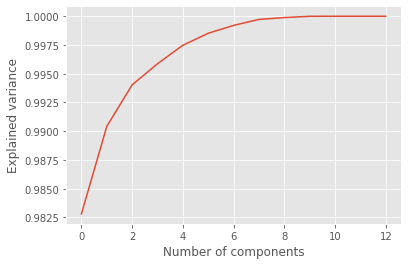

In [39]:
plt.plot(np.cumsum(pca_13.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plt.png', dpi=100)

In [40]:
pca_95 = PCA(n_components=0.99, random_state=2000)
pca_95.fit(df_train_try2)
X_pca_95 = pca_95.transform(df_train_try2)

In [41]:
X_pca_95.shape

(891, 2)

In [42]:
df_test_copy

,Pclass,Fare,Age_Level,IsAlone,female,male,C,Q,S,Dr/major/Military,Master,Miss/Mrs
0,3,-0.497413,30,1,0,1,0,1,0,0,0,0
1,3,-0.512278,40,0,1,0,0,0,1,0,0,1
2,2,-0.464100,30,1,0,1,0,1,0,0,0,0
3,3,-0.482475,40,1,0,1,0,0,1,0,0,0
4,3,-0.417492,40,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,-0.493455,30,1,0,1,0,0,1,0,0,0
414,1,1.314435,50,1,1,0,1,0,0,0,0,1
415,3,-0.507796,30,1,0,1,0,0,1,0,0,0
416,3,-0.493455,40,1,0,1,0,0,1,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

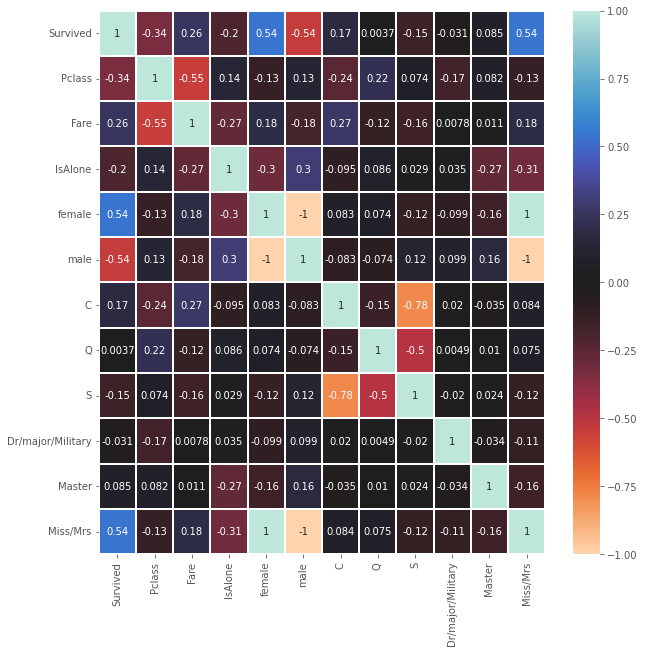

In [43]:
sns.heatmap(df_train_try2.corr(),annot=True,cmap='icefire_r',linewidths=0.2)
plot = plt.gcf()
plot.set_size_inches(10,10)
plt.show

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [45]:
Y = df_train_try2['Survived'].copy(deep=True)
df_train_try2.drop('Survived',axis=1, inplace=True)

In [46]:
np.random.seed(7)
#try 2 data
X_train2, X_rest, y_train2, y_rest = train_test_split(df_train_try2,Y,train_size=0.7, random_state=10)#training set split
X_valid, X_test, y_valid, y_test = train_test_split(X_rest,y_rest,train_size=0.7, random_state=10)#validation set and testing set split

In [47]:
#new data
RFML = RandomForestClassifier(criterion='gini',
                              n_estimators=1125, 
                              max_depth=6, 
                              min_samples_split=2, 
                              min_samples_leaf=2,
                              max_features = 'auto',  
                              bootstrap = False,
                              random_state = 45)
RFML.fit(X_train2,y_train2)
print(RFML.score(X_valid, y_valid))

0.8449197860962567


In [48]:
#new data
DTML = DecisionTreeClassifier()
DTML.fit(X_train2,y_train2)
print(DTML.score(X_valid, y_valid))

0.786096256684492


In [49]:
#new data
LRML = LinearRegression()
LRML.fit(X_train2,y_train2)
print(LRML.score(X_valid, y_valid))

0.4222405603332591


So based on the above, Random Forest Classifier have highest accuracy

In [50]:
from sklearn.metrics import f1_score
print('The f1_score is: ', f1_score(y_valid,RFML.predict(X_valid)))

The f1_score is:  0.7943262411347518


In [51]:
from sklearn.metrics import auc, roc_curve
RFML_fpr, RFML_tpr, threshold = roc_curve(y_valid, RFML.predict(X_valid))
print('The AUC is: ', auc(RFML_fpr,RFML_tpr))

The AUC is:  0.8286904761904761


In [52]:
predictions = RFML.predict(df_test_copy)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
